# Что надо для АБ

1) Формулировка гипотезы (0 - результаты одинаковые, альтернатива - есть разница)

2) выкатили новую механику ответов на вопросы - стало ли лучше?

3) Метрика - количество целевых действий на пользователя

4) Делим пользователей на группы. (соленое хеширование) (исходя из ожидаемого эффекта)

5) Запускаем

6) Ждем

1) Кол-во действий

2) Время на пользователя

3) Retention rate

    Доля новых пользователей, которые пришли во время теста и вернулись после этого на день X

4) Кол-во вопросов

5) Кол-во других действий определенного сорта

6) Кол-во "затыканий"

7) Время задержки (Latency)



In [1]:
import pandas as pd

In [29]:
df = pd.read_csv('queries_per_user.csv')

In [30]:
df.groupby('exp_group')['device_id'].nunique()

exp_group
BASE    58539
EXP1    14545
Name: device_id, dtype: int64

In [8]:
!pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 1.3 MB/s eta 0:00:0000:0100:01m


In [10]:
import duckdb

q = '''
SELECT exp_group, count(distinct device_id)
FROM df
group by exp_group
'''

duckdb.query(q).to_df()

,exp_group,count(DISTINCT device_id)
0,EXP1,14545
1,BASE,58539


<Axes: >

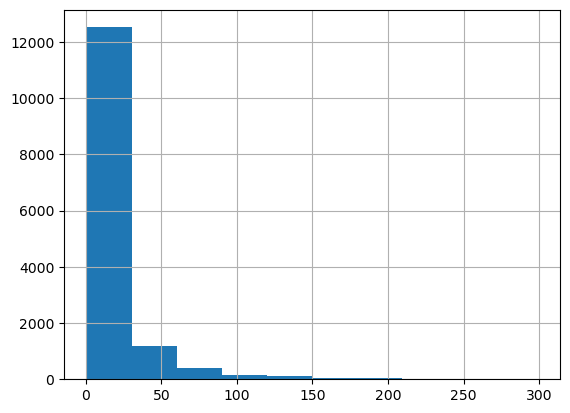

In [15]:
df[(df.exp_group == 'EXP1')&(df.phrases <= 300)].phrases.hist()

In [31]:
from scipy.stats import ttest_ind

In [32]:
exp = df[(df.exp_group == 'EXP1')].phrases
ctrl = df[(df.exp_group != 'EXP1')].phrases

In [33]:
exp.mean(),ctrl.mean()

(17.10536266758336, 15.607637643280547)

In [24]:
ttest_ind(exp,ctrl, equal_var = False)

TtestResult(statistic=3.0933571820495596, pvalue=0.0019813506058485616, df=23782.947298823212)

In [34]:
df = df[(df.phrases < 1000) & (df.phrases_before < 1000)]

In [36]:
exp = df[(df.exp_group == 'EXP1')].phrases
ctrl = df[(df.exp_group != 'EXP1')].phrases

In [37]:
ttest_ind(exp,ctrl, equal_var = False)

TtestResult(statistic=4.249616094368319, pvalue=2.15040589299793e-05, df=21459.772239403206)

In [39]:
exp.mean()/ctrl.mean()

1.08773793477331

In [71]:
import numpy as np
from scipy.stats import binom, norm

In [67]:
# x_clicks = binom(n=x_views, p=theta1).rvs()

In [69]:
y_views.min()

0.0009260305801827149

In [82]:
mu = 1
sigma2 = 1.5
N = 5000
experiments = 1
views_A = np.absolute(np.exp(norm(mu, sigma2).rvs(
    experiments * N)).astype(np.int64).reshape(experiments, N) + 1).ravel()

views_B = np.absolute(np.exp(norm(mu, sigma2).rvs(
    experiments * N)).astype(np.int64).reshape(experiments, N) + 1).ravel()

theta1 = [0.05]*5000
theta2 = [0.06]*5000


clicks_A = binom.rvs(views_A, theta1)
clicks_B = binom.rvs(views_B, theta2)

In [83]:
k = clicks_A.sum()/views_A.sum()
k

0.050923284106731186

In [84]:
linearized_A = clicks_A - k*views_A

linearized_B = clicks_B - k*views_B

In [86]:
ttest_ind(clicks_A, clicks_B, equal_var = False)

TtestResult(statistic=-2.378996359363809, pvalue=0.0173790027834322, df=9739.616867051876)

In [87]:
ttest_ind(linearized_A, linearized_B, equal_var = False)

TtestResult(statistic=-5.65468985152875, pvalue=1.6043193074812685e-08, df=9959.02201044759)